In [1]:
#kernel svm
#In linear svm the data is linearly separable but here it is not linearly sep.
#non linear data set is mapped to a higher dimension space and then it is projected onto 
#original plane and linearly separated
#mapping to higher dim. can be highly compute-intensive(power consumption is high)
#to obtain better results from kernel svm ,we use gaussian rbf kernel trick to reduce the power consumption
#gaussian kernel func K is landmark K(x,l[i] = exp(-(x-l[i])^2/2*(sigma)^2)
#here sigma tells us how wide(radius) the decision boundary is



In [2]:
#types of kernel functions 

#1- Gaussian rbf func K(x,l[i] = exp(-(x-l[i])^2/2*(sigma)^2)
#2-sigmoid kernel K(x,y) =tanh(rho *x^transpose*y =r)
#3 polynomial kernel K(x,y) = (rho *x^transpose*y =r)^d ,rho>0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


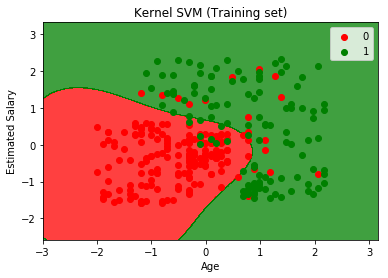

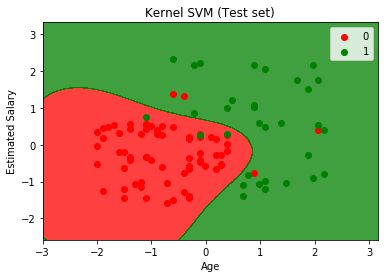

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('Social_Network_Ads.csv')
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x = LabelEncoder()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

#fitting Kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf',random_state =0)
classifier.fit(x_train,y_train)
#predict the test set results
y_pred = classifier.predict(x_test)

#making the confusion matrix(correct vs incorrect predictions that our model made)
from sklearn.metrics import confusion_matrix
#here the confusion_matrix is a class
cm = confusion_matrix(y_test,y_pred)

#visualising the trainig set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1])

In [32]:
cm

array([[64,  4],
       [ 3, 29]])